<a href="https://colab.research.google.com/github/JaehwanKim00/class_ai4dl/blob/main/%EA%B9%80%EC%9E%AC%ED%99%98_%EB%8F%84%EC%84%9C%EA%B4%80_EDA_%EC%95%84%EB%8F%99%EC%A0%9C%EC%99%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
!pip install konlpy
from konlpy.tag import Komoran  # Komoran 형태소 분석기를 사용

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 37.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (20.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

#MZ 세대 연령별 성별 작가 대출합계 순위

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_gender_아동제외.csv',skiprows=13,encoding='cp949')

In [ ]:
print(df.head())

   순위                           서명        저자                  출판사  출판년도   권  \
0   1         달러구트 꿈 백화점.이미예 장편소설   지은이: 이미예                팩토리나인  2020 NaN   
1   2           불편한 편의점 :김호연 장편소설   지은이: 김호연                나무옆의자  2021 NaN   
2   3          지구 끝의 온실 :김초엽 장편소설   지은이: 김초엽  Giant Books(자이언트북스)  2021 NaN   
3   4  우리가 빛의 속도로 갈 수 없다면 :김초엽 소설   지은이: 김초엽                   허블  2019 NaN   
4   5           시선으로부터, :정세랑 장편소설   지은이: 정세랑                 문학동네  2020 NaN   

           ISBN  ISBN부가기호    KDC    대출건수  
0  9.790000e+12      3810  813.7  11,940  
1  9.790000e+12      3810  813.7  10,414  
2  9.790000e+12      3810  813.7   9,595  
3  9.790000e+12      3810  813.7   8,920  
4  9.790000e+12      3810  813.7   8,847  


In [ ]:
df['ISBN부가기호'].head()

0    3810
1    3810
2    3810
3    3810
4    3810
Name: ISBN부가기호, dtype: int64

In [ ]:
df = pd.DataFrame([['77777', 'Kim', 'H'],
                             [None, 'Lee', 'W'],
                             ['55555', 'Jeong', 'S']], columns = ['ISBN부가기호', 'name', 'class'])

In [ ]:
# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 결과 확인
print(df)

  ISBN부가기호   name class
1     None    Lee     W
2    55555  Jeong     S


         저자  대출건수 합계
0       구병모    19687
1       김영하    16975
2       김초엽    33690
3  무라카미 하루키    17794
4       이미예    21269
5       정세랑    46657
6       정유정    23552
7       천선란    19032
8       최은영    21899
9  히가시노 게이고    59822


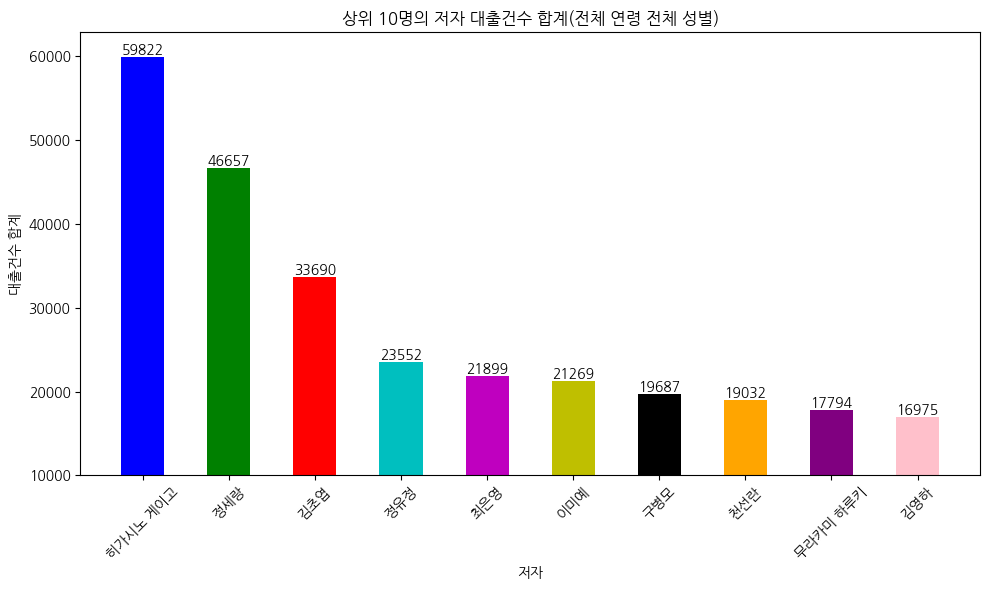

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_gender_아동제외.csv',skiprows=13,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]
# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 결과 확인
#print(df)

import pandas as pd


# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거


import pandas as pd


# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(전체 연령 전체 성별)')
plt.xticks(rotation=45)
plt.tight_layout()


# y축 범위 설정
plt.ylim(10000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)


plt.show()



In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

1696992
280377
16.521998925156982


          저자  대출건수 합계
0        김초엽     3778
1   무라카미 하루키     7264
2  베르나르 베르베르     5348
3        송희구     3223
4        오건영     2901
5        이미예     3016
6        정세랑     3072
7        정유정     3256
8        채사장     3986
9   히가시노 게이고    16565


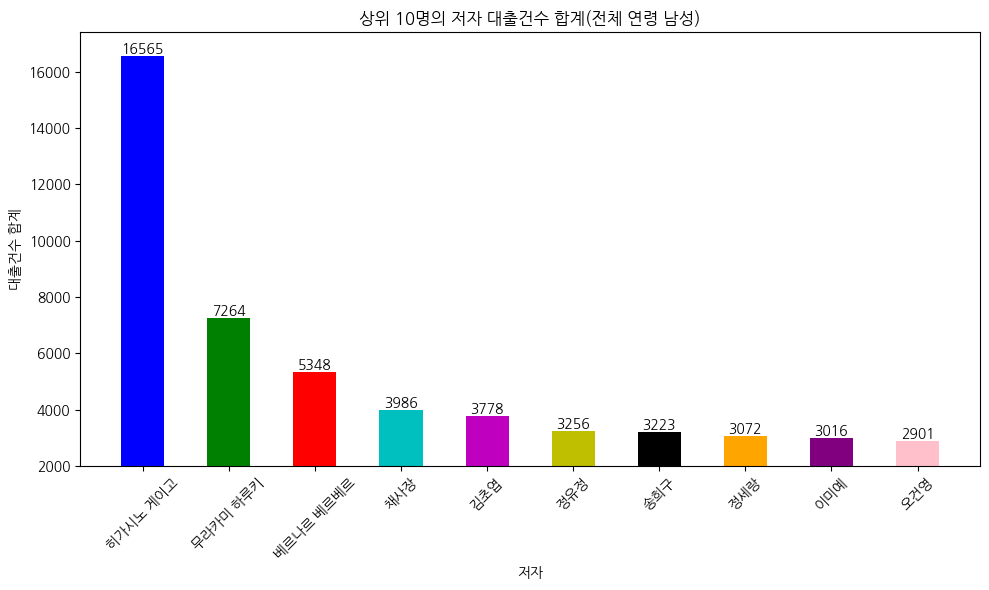

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_male_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(전체 연령 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(result_df['대출건수 합계'].sum())

52409


         저자  대출건수 합계
0       구병모    17635
1       김영하    13105
2       김초엽    29136
3       김호연    12911
4       이미예    17304
5       정세랑    40645
6       정유정    19202
7       천선란    16492
8       최은영    18886
9  히가시노 게이고    38731


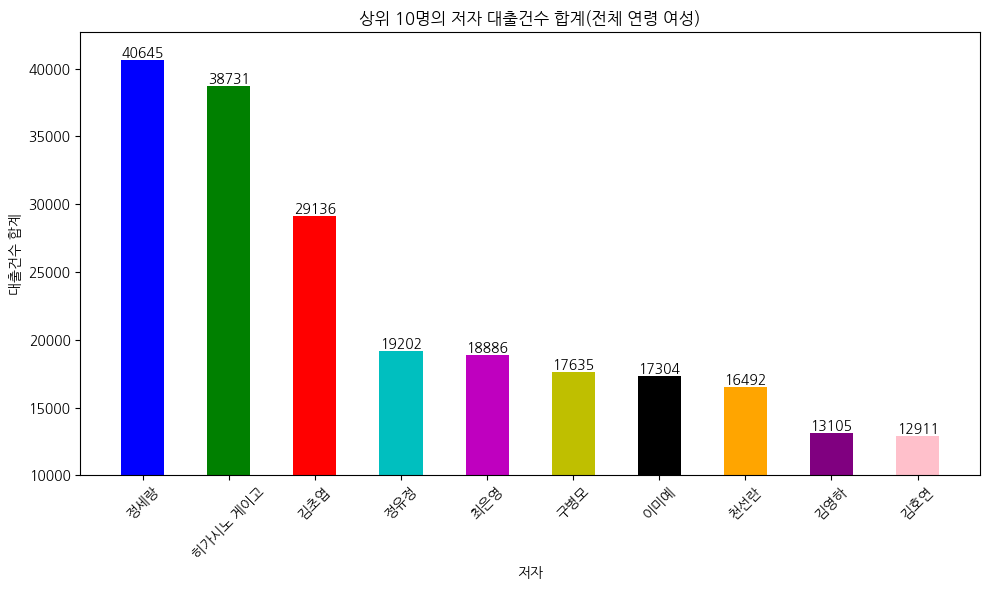

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_age_female_아동제외.csv',skiprows=13,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(전체 연령 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(10000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(result_df['대출건수 합계'].sum())

224047


          저자  대출건수 합계
0        구병모     3359
1        김동식     4683
2        김초엽     4617
3  베르나르 베르베르     3515
4    요코제키 다이     2480
5    이치조 미사키     2755
6        이희영     3141
7        정세랑     4840
8        정유정     3537
9   히가시노 게이고    10806


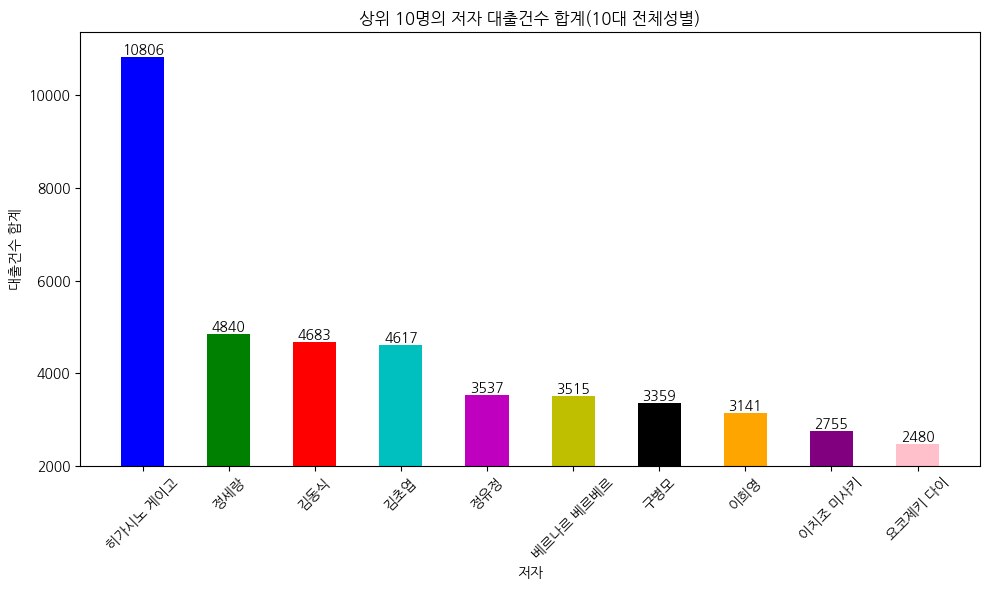

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_teen_gender_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(10대 전체성별)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(result_df['대출건수 합계'].sum())

43733


          저자  대출건수 합계
0    J.K. 롤링      989
1        고정욱      749
2        김동식     1351
3        김초엽      789
4  베르나르 베르베르     1354
5    요코제키 다이      788
6        이희영      924
7        채사장      783
8        허영만      764
9   히가시노 게이고     2908


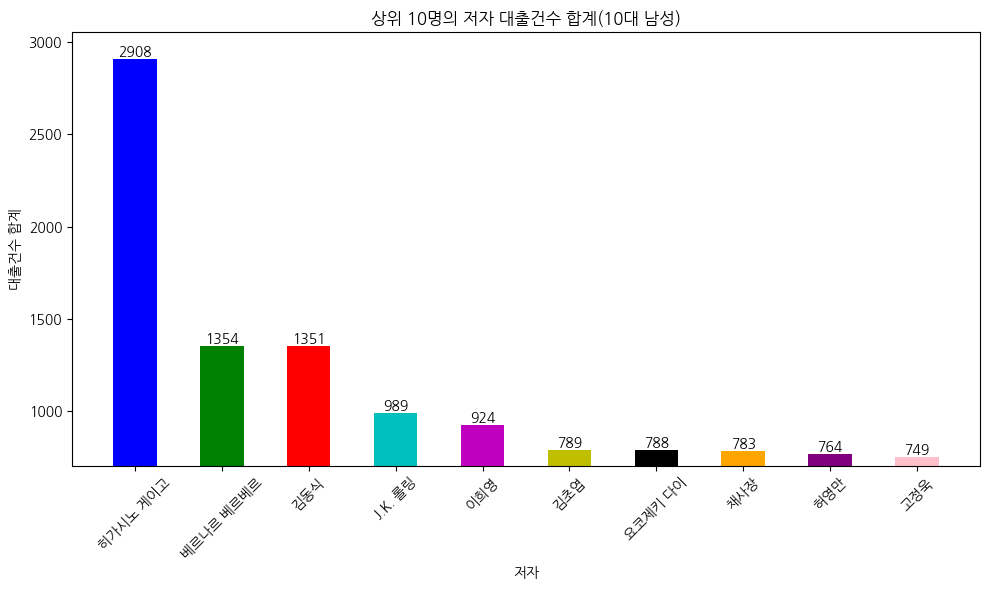

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_teen_male_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(10대 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(700, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

89704
11399
12.707348613216801


          저자  대출건수 합계
0        구병모     2927
1        김동식     3033
2        김초엽     3423
3  베르나르 베르베르     1804
4    이치조 미사키     2008
5        이희영     2061
6        정세랑     3681
7        정유정     2603
8        최진영     2144
9   히가시노 게이고     7385


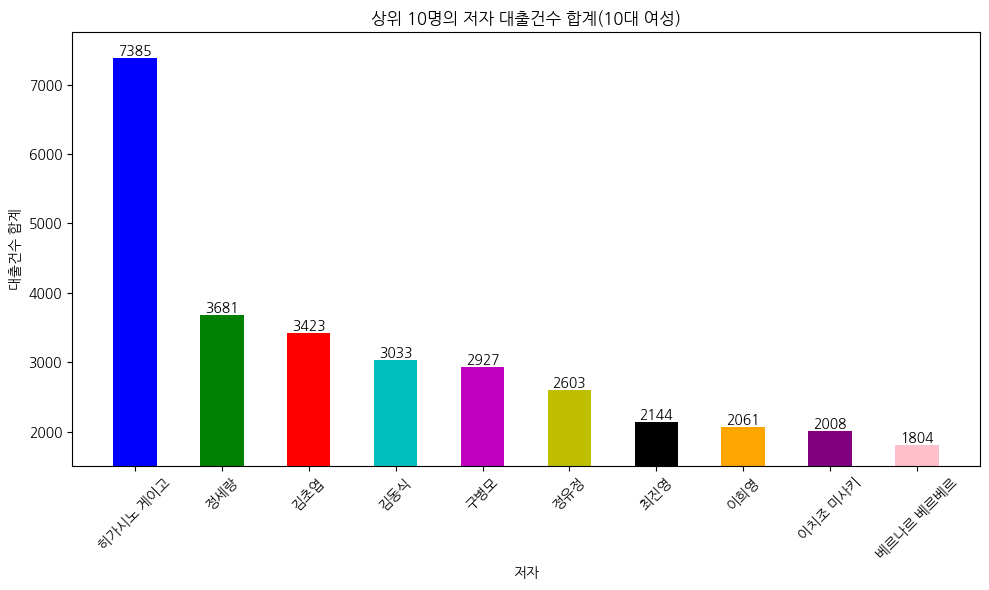

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_teen_female_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(10대 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1500, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

188075
31069
16.519473614249634


         저자  대출건수 합계
0       구병모    12036
1       김초엽    18063
2  무라카미 하루키     9301
3       이미예     8310
4       정세랑    25352
5       정유정     9855
6       조예은     8189
7       천선란    10326
8       최은영     9868
9  히가시노 게이고    27544


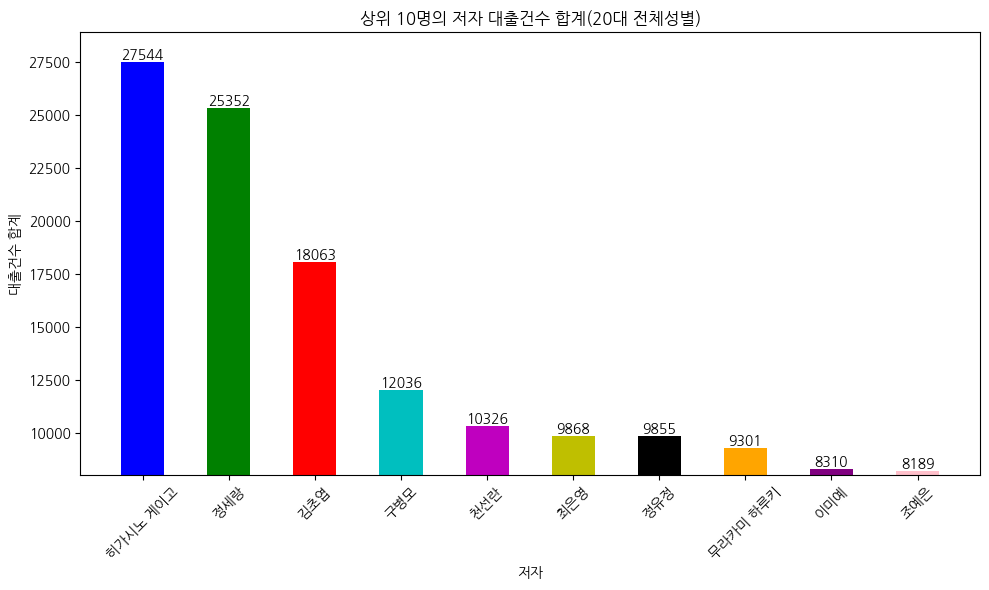

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_twenty_gender_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(20대 전체성별)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(8000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(result_df['대출건수 합계'].sum())

138844


               저자  대출건수 합계
0   지은이: 히가시노 게이고     7936
1   지은이: 무라카미 하루키     3775
2          채사장 지음     2041
3  지은이: 베르나르 베르베르     1739
4        지은이: 김초엽     1573
5        지은이: 정세랑     1300
6          유현준 지음     1235
7     지은이: 유발 하라리     1179
8        지은이: 정유정     1163
9      엠제이 드마코 지음     1135
          저자  대출건수 합계
0        김초엽     1573
1   무라카미 하루키     3775
2  베르나르 베르베르     1739
3    엠제이 드마코     1135
4     유발 하라리     1179
5        유현준     1235
6        정세랑     1300
7        정유정     1163
8        채사장     2041
9   히가시노 게이고     7936


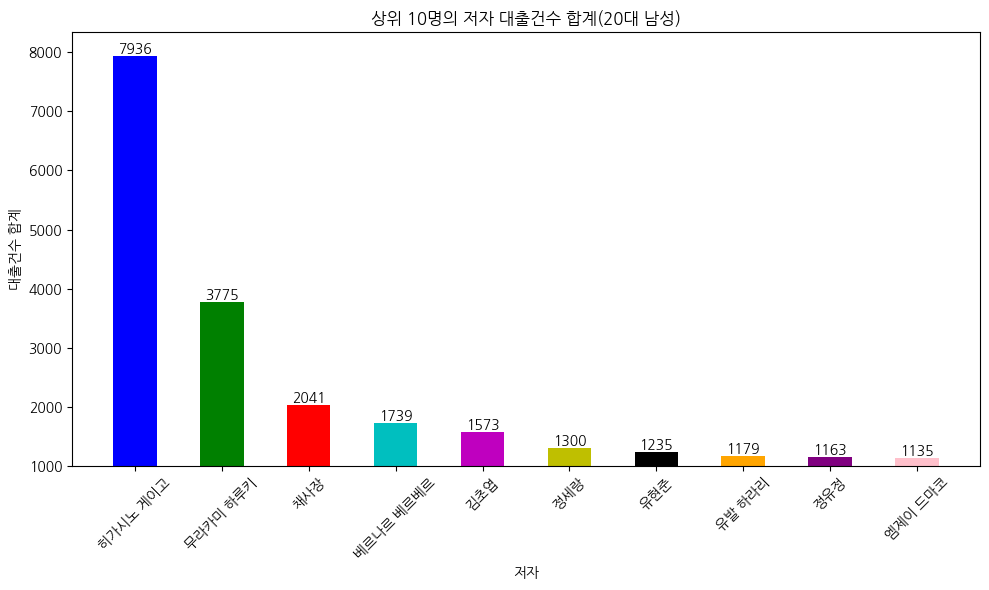

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_twenty_male_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

print(result_df)

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(20대 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

150358
23076
15.347370941353303


         저자  대출건수 합계
0       구병모    11312
1       김초엽    15840
2       이미예     6842
3       정세랑    22620
4       정유정     8297
5       조예은     7613
6       천선란     9184
7       최은영     8592
8       최진영     6138
9  히가시노 게이고    18623


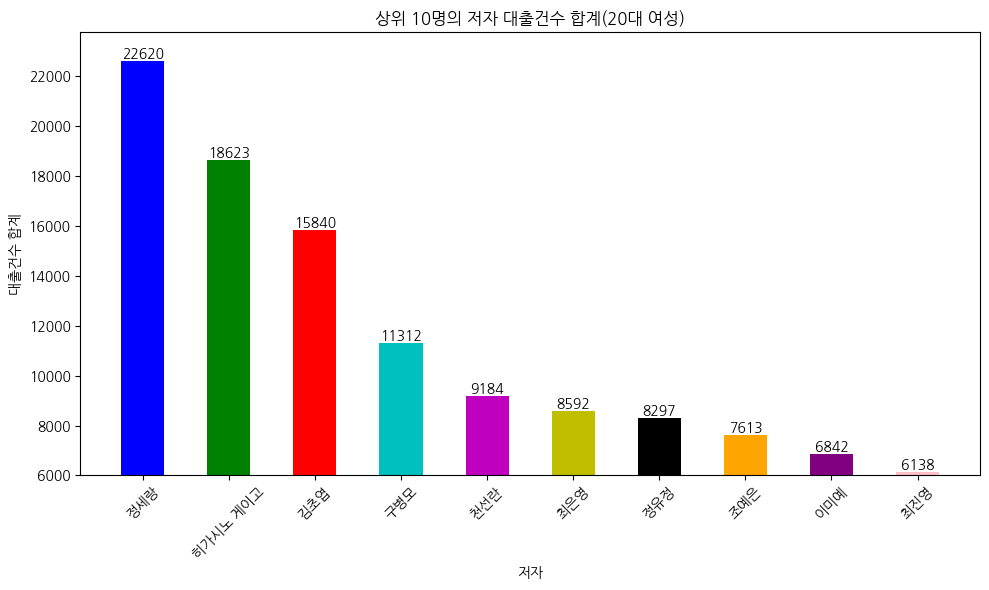

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_twenty_female_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(20대 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(6000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

536286
115061
21.455156390433462


         저자  대출건수 합계
0       김영하     7848
1       김초엽    11666
2       김호연    10573
3       송희구    10380
4       오은영     7433
5       이미예    10013
6       정세랑    15019
7       정유정     9710
8       최은영    10051
9  히가시노 게이고    16645


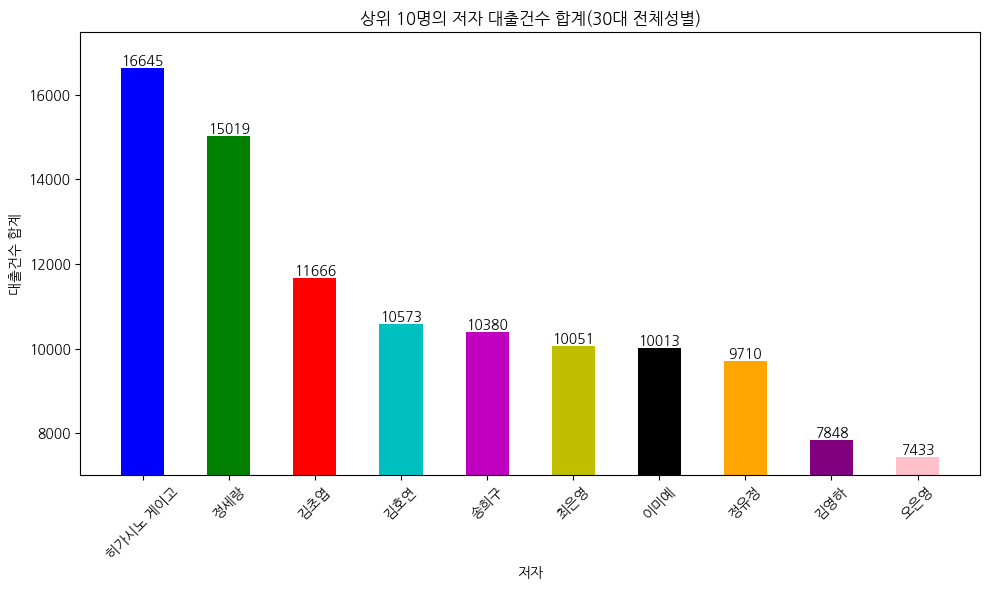

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_thirty_gender_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(30대 전체성별)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(7000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(result_df['대출건수 합계'].sum())

109338


          저자  대출건수 합계
0        강환국     2000
1   로버트 기요사키     1603
2   무라카미 하루키     2728
3  베르나르 베르베르     2068
4        송희구     2392
5    엠제이 드마코     1560
6        오건영     2004
7      팀 페리스     1660
8        홍춘욱     1526
9   히가시노 게이고     4080


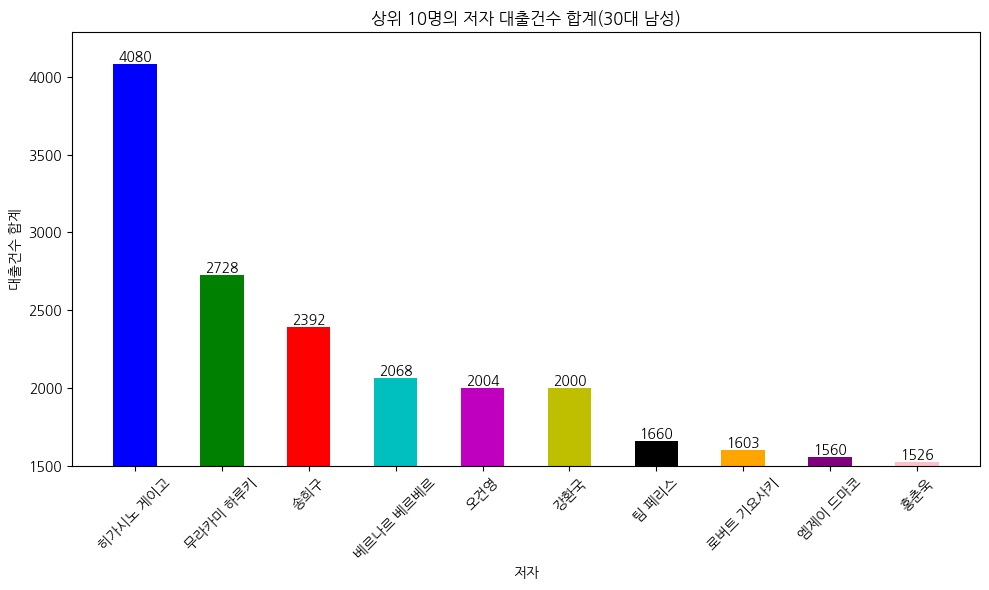

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_thirty_male_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(30대 남성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(1500, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

         저자  대출건수 합계
0       김영하     6299
1       김초엽     9955
2       김호연     8943
3       송희구     7769
4       오은영     6228
5       이미예     8427
6       정세랑    13123
7       정유정     7944
8       최은영     8855
9  히가시노 게이고    11566


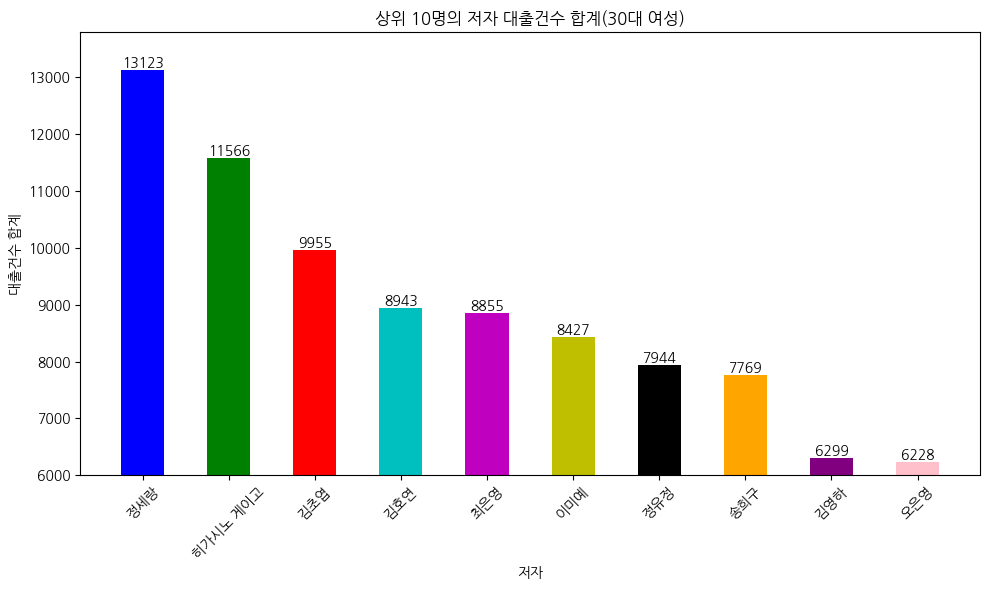

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_thirty_female_아동제외.csv',skiprows=13,encoding='cp949')


# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)
# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(30대 여성)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(6000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

#비MZ 작가순위

               저자  대출건수 합계
0             조정래    40974
1   지은이: 히가시노 게이고    40428
2        지은이: 박경리    20580
3        지은이: 김영하    19625
4        지은이: 김진명    19161
5        지은이: 김호연    15912
6         지은이: 김훈    15005
7        지은이: 정유정    12900
8          이민진 지음    10469
9  지은이: 베르나르 베르베르    10391
          저자  대출건수 합계
0        김영하    19625
1        김진명    19161
2        김호연    15912
3         김훈    15005
4        박경리    20580
5  베르나르 베르베르    10391
6        이민진    10469
7        정유정    12900
8        조정래    40974
9   히가시노 게이고    40428


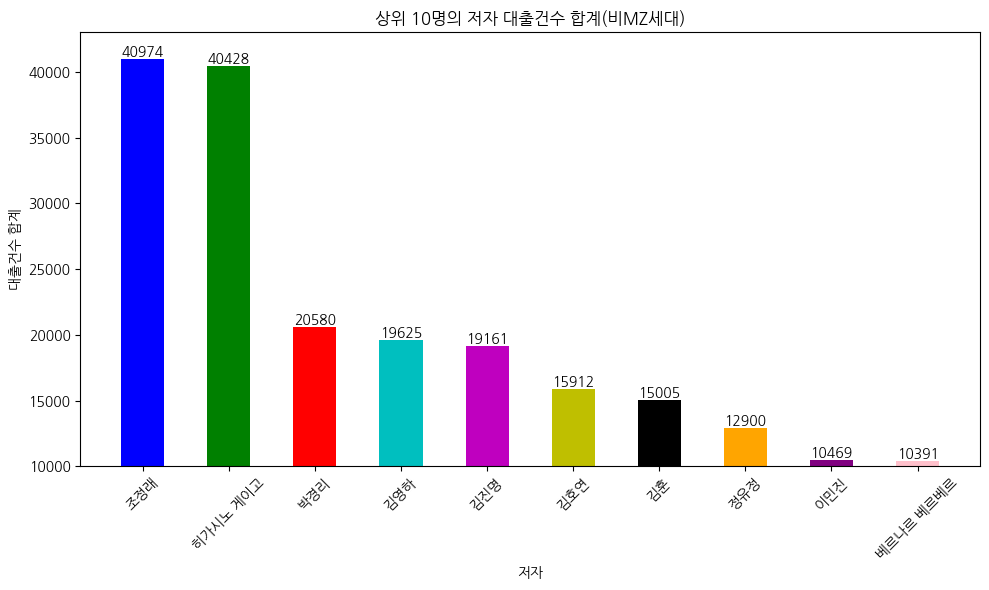

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2023_0630_notMZ_아동제외.csv',skiprows=13,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

print(result_df)

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('상위 10명의 저자 대출건수 합계(비MZ세대)')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(10000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

In [ ]:
print(df['대출건수'].sum())
print(cleaned_result_df['대출건수 합계'].sum())
비율 = cleaned_result_df['대출건수 합계'].sum()/df['대출건수'].sum()*100
print(비율)

1040890
205445
19.737436232454918


#분기별 MZ 작가 순위

          저자  대출건수 합계
0        구병모     4016
1        김초엽     5994
2   무라카미 하루키     3479
3  베르나르 베르베르     3064
4        이미예     3527
5        정세랑     9675
6        정유정     4887
7        천선란     2900
8        최은영     3258
9   히가시노 게이고    13480


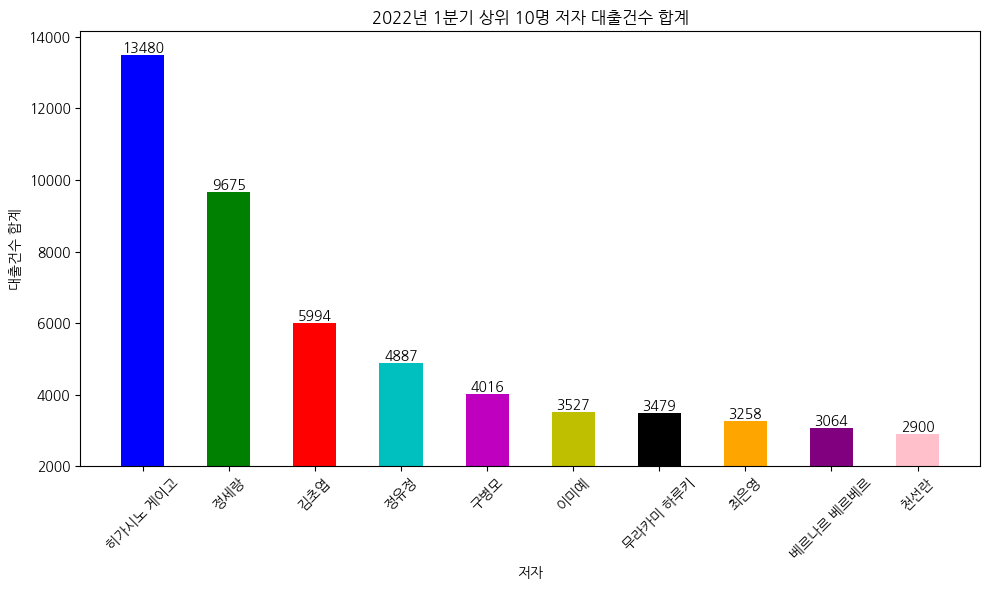

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0101_2022_0331_first_아동제외.csv',skiprows=13,encoding='cp949')
# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]
# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 1분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

         저자  대출건수 합계
0       구병모     3318
1       김초엽     6215
2  무라카미 하루키     3132
3       송희구     2553
4       이미예     3828
5       정세랑     7883
6       정유정     3893
7       천선란     2743
8       최은영     3533
9  히가시노 게이고     8641


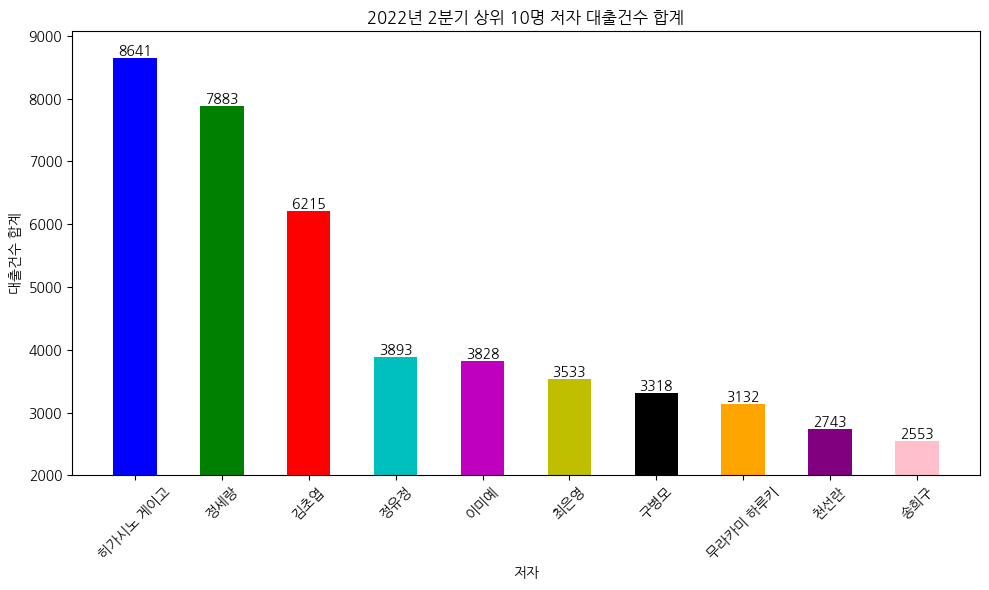

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0401_2022_0630_second_아동제외.csv',skiprows=13,encoding='cp949')
# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]
# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 2분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

          저자  대출건수 합계
0        구병모     3615
1        김초엽     6091
2   무라카미 하루키     3404
3  베르나르 베르베르     3501
4        이미예     3823
5        정세랑     7975
6        정유정     4273
7        천선란     3418
8        최은영     4439
9   히가시노 게이고    10494


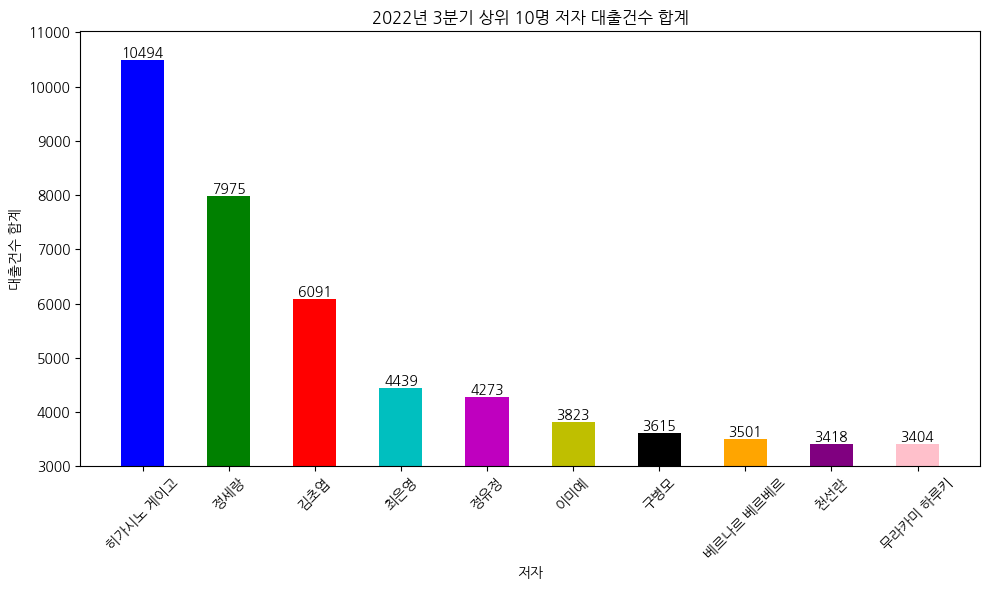

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_0701_2022_0930_third_아동제외.csv',skiprows=13,encoding='cp949')
# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]
# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 3분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(3000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

         저자  대출건수 합계
0       구병모     2692
1       김영하     3044
2       김초엽     5681
3       김호연     3336
4       이미예     3665
5       정세랑     7085
6       정유정     3468
7       천선란     3107
8       최은영     3674
9  히가시노 게이고     8323


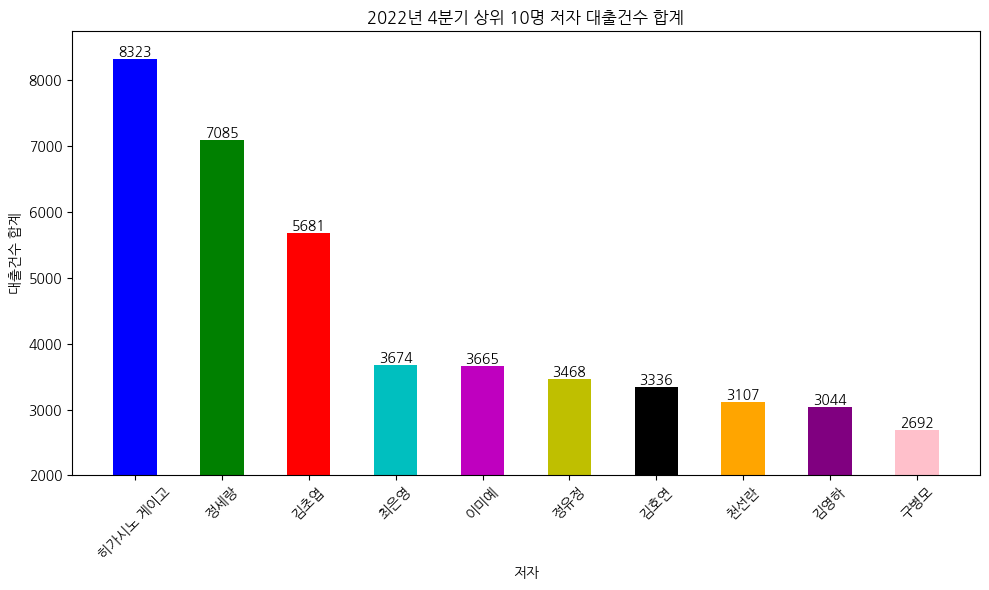

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2022_1001_2022_1231_fourth_아동제외.csv',skiprows=13,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2022년 4분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

         저자  대출건수 합계
0       구병모     3179
1       김영하     3215
2       김초엽     5624
3       김호연     3111
4       이미예     3370
5       정세랑     7307
6       정유정     3810
7       천선란     3514
8       최은영     3710
9  히가시노 게이고     9457


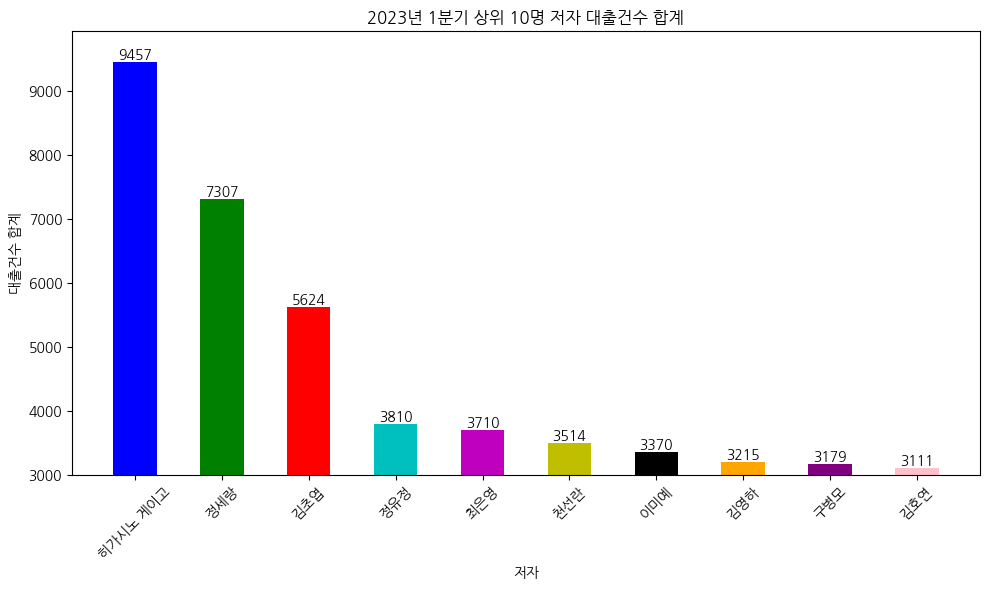

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2023_0101_2023_0331_first_아동제외.csv',skiprows=13,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2023년 1분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(3000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()

         저자  대출건수 합계
0       구병모     3424
1       김초엽     4504
2       김호연     3348
3  무라카미 하루키     2578
4       이미예     2997
5       정세랑     5532
6       정유정     2937
7       천선란     3052
8       최은영     3285
9  히가시노 게이고     7417


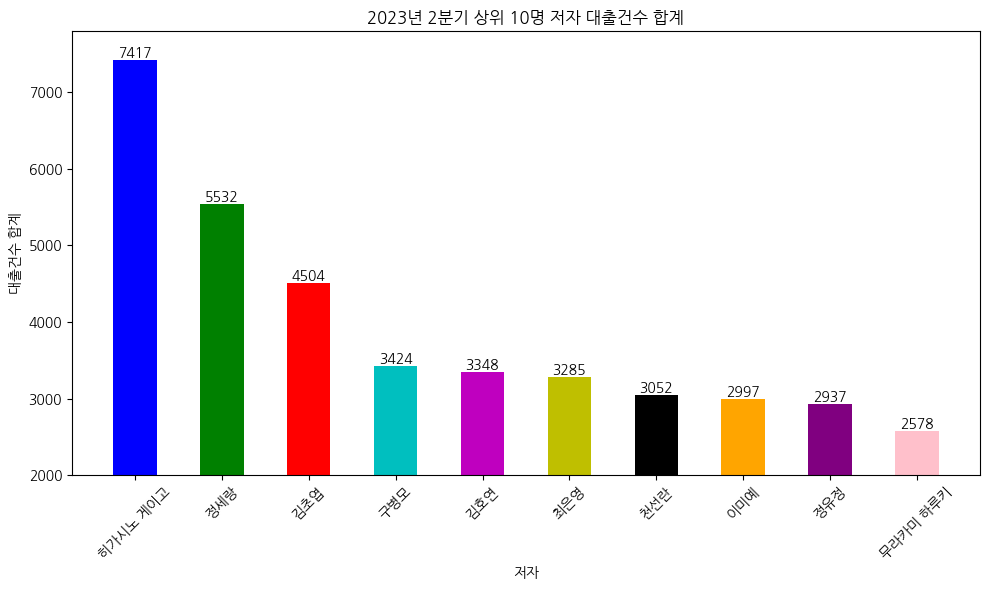

In [ ]:
dpath= "/content/drive/MyDrive/library_data/ISBN부가기호_아동제외/"
df =pd.read_csv(dpath+'BestLoanList_2023_0401_2023_0630_second_아동제외.csv',skiprows=13,encoding='cp949')

# ISBN부가기호 열에서 값이 없는 행 제거
df = df[df['ISBN부가기호'].notnull()]

# 앞에서 두 번째 숫자가 7인 행 제거
df = df[~df['ISBN부가기호'].astype(str).str[1].eq('7')]

# 저자와 대출건수 열을 제외한 모든 열을 제거
columns_to_keep = ['저자', '대출건수']  # 유지하려는 열
df = df[columns_to_keep]  # 지정한 열만 남기고 나머지 열은 제거

# 대출건수 열의 데이터 형식을 문자열로 변환
df['대출건수'] = df['대출건수'].astype(str)

# 쉼표 제거 및 정수로 변환
df['대출건수'] = df['대출건수'].str.replace(',', '').astype(int)

# 저자열 수정
def modify_author(author):
    if pd.notnull(author):
        if ';' in author:
            return author.split(';')[0].strip()
        elif ',' in author:
            return author.split(',')[0].strip()
    return author

df['저자'] = df['저자'].apply(modify_author)

# 저자를 기준으로 그룹화하여 대출건수 합산
grouped = df.groupby('저자')['대출건수'].sum()

# 대출건수 기준으로 내림차순 정렬하여 상위 10개의 저자 선택
top_authors = grouped.sort_values(ascending=False).head(10)

# 상위 10개의 저자와 대출건수로 새로운 데이터프레임 생성
result_df = pd.DataFrame(top_authors).reset_index()
result_df.columns = ['저자', '대출건수 합계']

import pandas as pd
from konlpy.tag import Okt


# 데이터프레임 생성 (result_df는 이미 생성되었다고 가정)
# result_df = ...

# 형태소 분석기 초기화
okt = Okt()

# '저자' 열에서 불필요한 부분 제거 함수
def remove_unwanted_text(text):
    unwanted_keywords = ['지은이:', '지음', '글·그림', '저자:', '원작:', '글', '글:',':']
    for keyword in unwanted_keywords:
        text = text.replace(keyword, '')
    return text.strip()

# '저자' 열 수정
result_df['저자'] = result_df['저자'].apply(remove_unwanted_text)

# 이름이 같은 저자의 대출건수 합계 계산
grouped_df = result_df.groupby('저자')['대출건수 합계'].sum().reset_index()

# 결과 데이터프레임 생성
cleaned_result_df = grouped_df.copy()

# 결과 확인
print(cleaned_result_df)

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']  # 다른 색상 지정
bars = plt.bar(result_df['저자'], result_df['대출건수 합계'], width=0.5, color=colors)
plt.xlabel('저자')
plt.ylabel('대출건수 합계')
plt.title('2023년 2분기 상위 10명 저자 대출건수 합계')
plt.xticks(rotation=45)
plt.tight_layout()

# y축 범위 설정
plt.ylim(2000, plt.ylim()[1])

# 숫자 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center', color='k', fontsize=10)

plt.show()